In [1]:
#House Price Predictor 
#By: Amitava Samadaar, Prem Ganesh Elango & Suvrangshu Ghosh
#UC Berkeley Boot Camp, May 2019

House Price Predictor 
By: Amitava Samadaar, Prem Ganesh Elango & Suvrangshu Ghosh

Problem Statement:
Efficient prediction of house price using machine learning.

This code will try to emphasize on solving the problem of predicting house prices for house buyers and house sellers.

A house value is based on many features besides its size and location, 
here we are going to use the various features available and analyses them to predict the price as accurately possible.



Predicting the real estate home price using Kaggle dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
Finding a dream home, selling the house with best price!!!
Here we will try to solve the problem of predicting house prices for house buyers and house sellers.
There are many factors which plays a major role We are going to take advantage of all of the feature variables available to use in the dataset and use it to analyze and predict house prices.
We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.
1.	Package and Data load 
2.	Analyzing the Test Variable 
3.	Multivariable Analysis
4.	Impute Missing Data and Clean Data
5.	Modeling and Predictions
The data in Kaggle is from Ames, Iowa . 
Here we will be using regression techniques with multi variable analysis using multiple models to see which gives the best results.

Understanding the data:
-	Understand the missing values:
Many columns has 'NaN' value.
Closer look tells that they are not missing, instead it means it doesn’t exist in that property.
like for PoolQC - Nan means no swimming pool
Find total missing
Take decision depending on the importance of the features.

Understand the Skewness and Kurtosis 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [3]:
# Load train and Test set
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [4]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [5]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [6]:
# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
#Analysing the Test , which has Sale Price
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
#Average price in Amazon, Iowa - Avrage price for average home $180921.

In [13]:
# Comparing both data frames, we can see that the only difference in features is "Sale Price". 
# This makes sense because we are trying to predict it!
# understanding Skewness, Kurtosis (https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291)

Skewness: 1.882876
Kurtosis: 6.536282


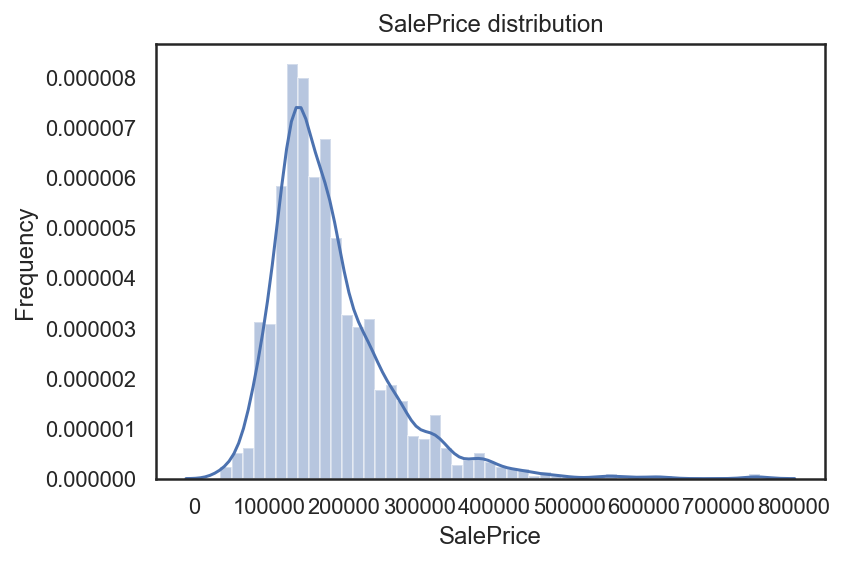

In [14]:
sns.distplot(train['SalePrice']);
#skewness and kurtosis
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [15]:
#What we see is the target variable SalePrice is not normally distributted.
# This will effect the performance of ML prediction models, as some 


#will assume normal distribution (https://scikit-learn.org/stable/modules/preprocessing.html)

# making a log transformation, to make the distribution look a bit better

Skewness: 0.121335
Kurtosis: 0.809532


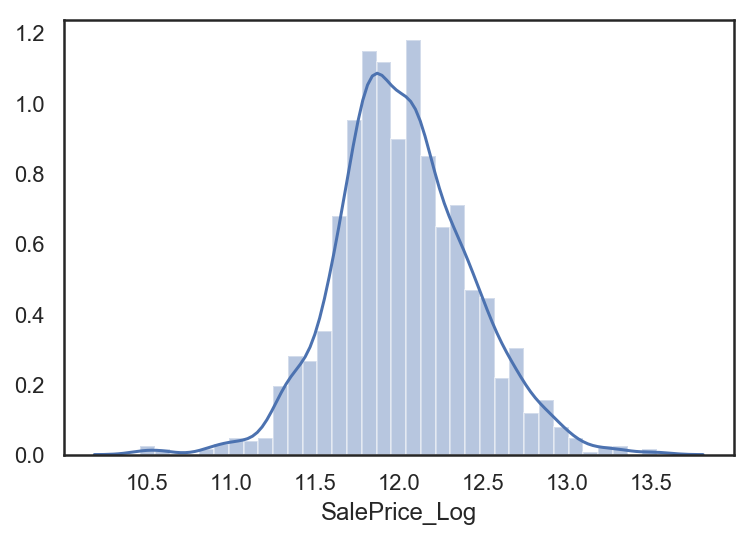

In [16]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice_Log'].skew())
print("Kurtosis: %f" % train['SalePrice_Log'].kurt())
# dropping old column
train.drop('SalePrice', axis= 1, inplace=True)

In [17]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')

In [19]:
#count number of categoricals columns
cat = len(train.select_dtypes(include=['object']).columns)
cat

43

In [20]:
#count number of numerical dataslen
numerical = len(train.select_dtypes(include=['int64','float64']).columns)
numerical


37

In [21]:
total_features = cat + numerical
total_features

80

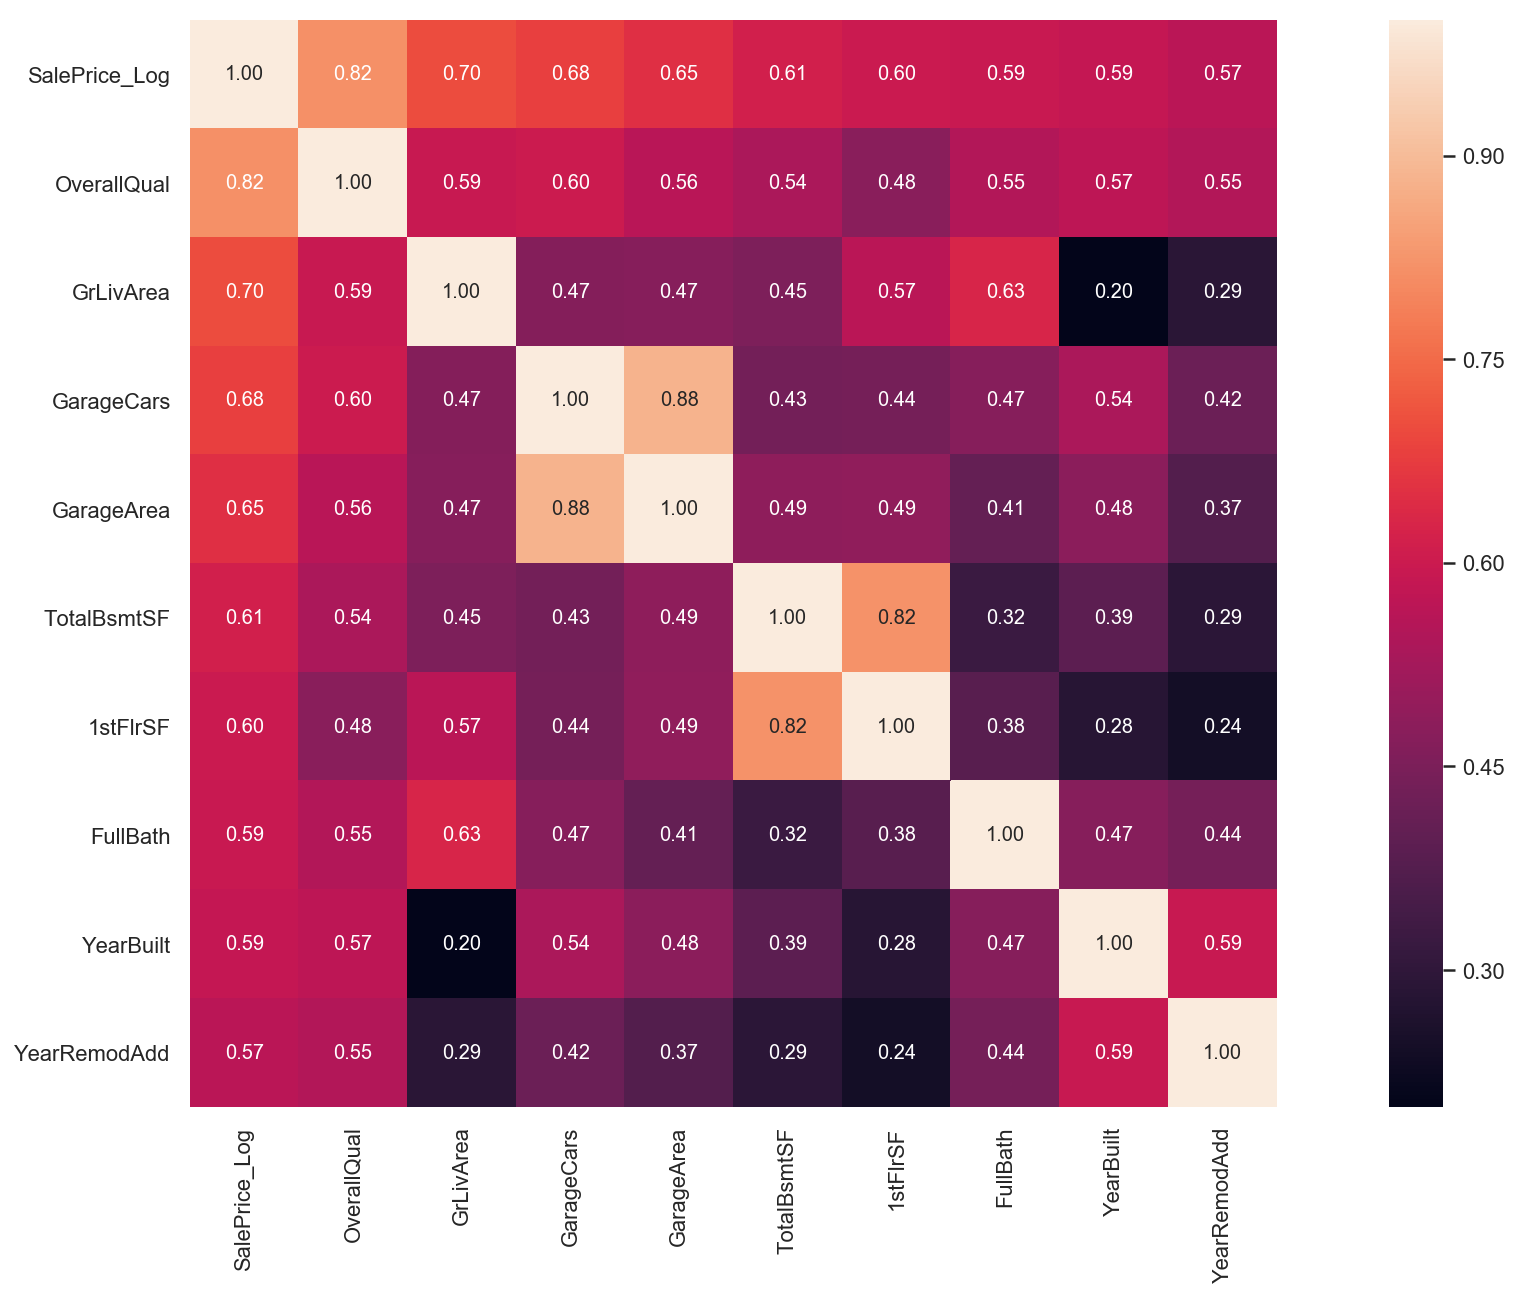

In [22]:
#top 10
top = 10
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 10))

cols = corrmat.nlargest(top, 'SalePrice_Log')['SalePrice_Log'].index
cm = np.corrcoef(train[cols].values.T)
#sns.heatmap(corrmat, vmax=.8, square=True);
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
#check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [24]:
#find total missing
total_missing = train.isnull().sum().sort_values(ascending=False)
total_missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice_Log       0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [25]:

#Picking top 20 missing
total_missing = total_missing.head(20)

In [26]:
#Convert into dataframe
total_missing = total_missing.to_frame()

In [27]:
total_missing.columns = ['count']

In [28]:
total_missing.index.names = ['name']
total_missing['name'] = total_missing.index

In [29]:
total_missing.head()

,count,name
name,,
PoolQC,1453,PoolQC
MiscFeature,1406,MiscFeature
Alley,1369,Alley
Fence,1179,Fence
FireplaceQu,690,FireplaceQu


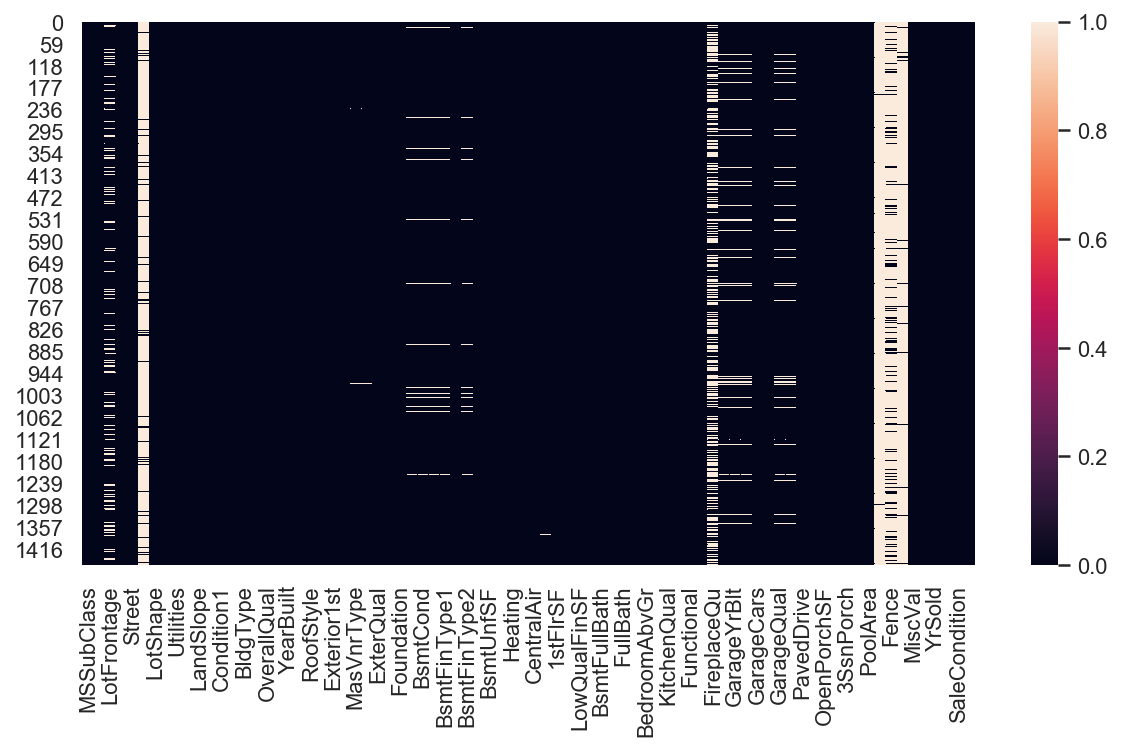

In [30]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

In [31]:
## lots of null values

In [32]:
#Understanding the missing values:
#Many columns has 'NaN' value.
#Closer look tells that they are not missing, instead it means it dosen't exist in that property.
# like for PoolQC - Nan means no swiming pool


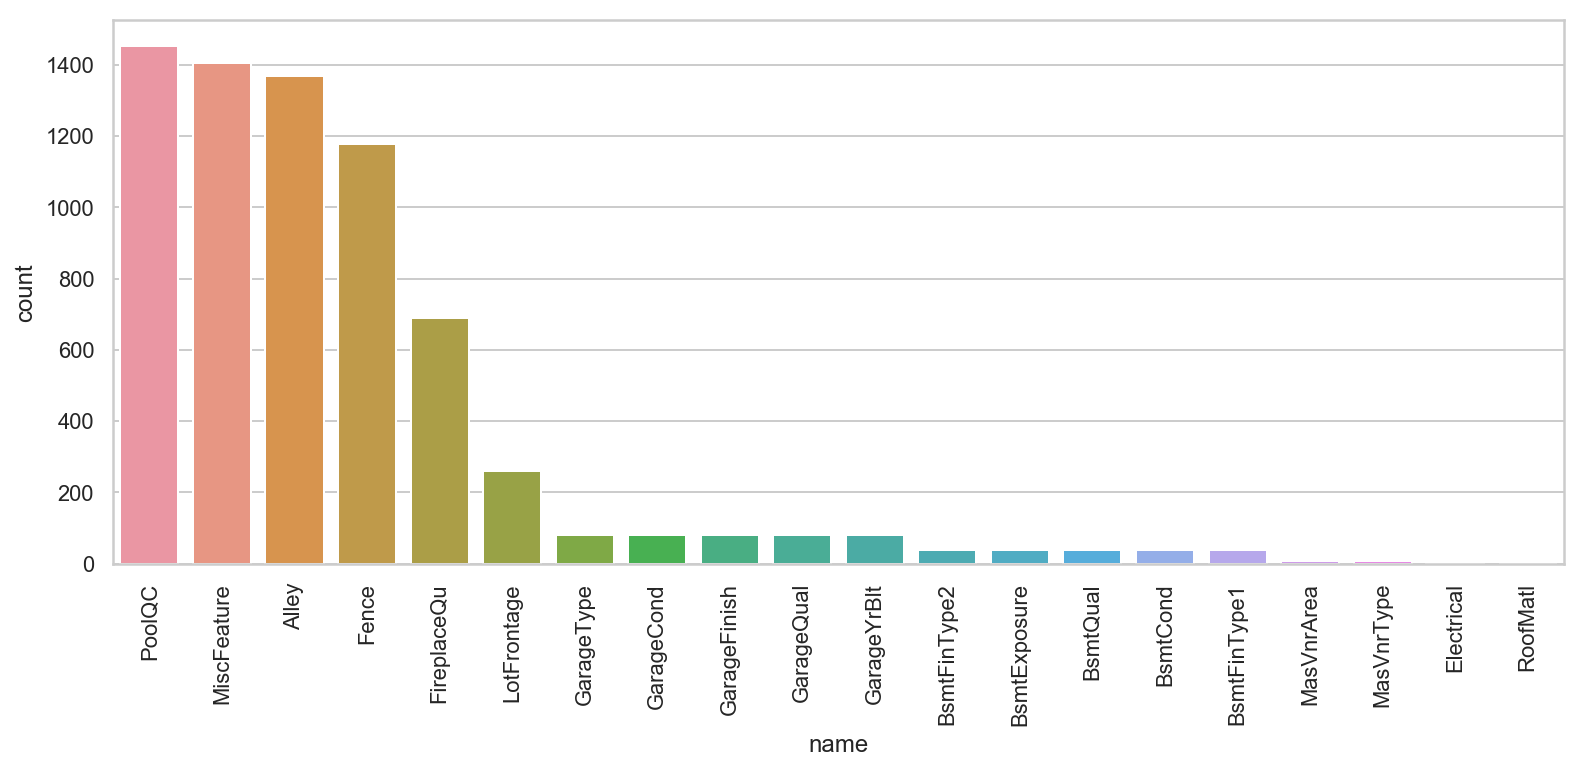

In [33]:
#plot Missing values

plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='name', y='count', data=total_missing)
plt.xticks(rotation = 90)
plt.show()

In [34]:
#get dataframe column list
list(train)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

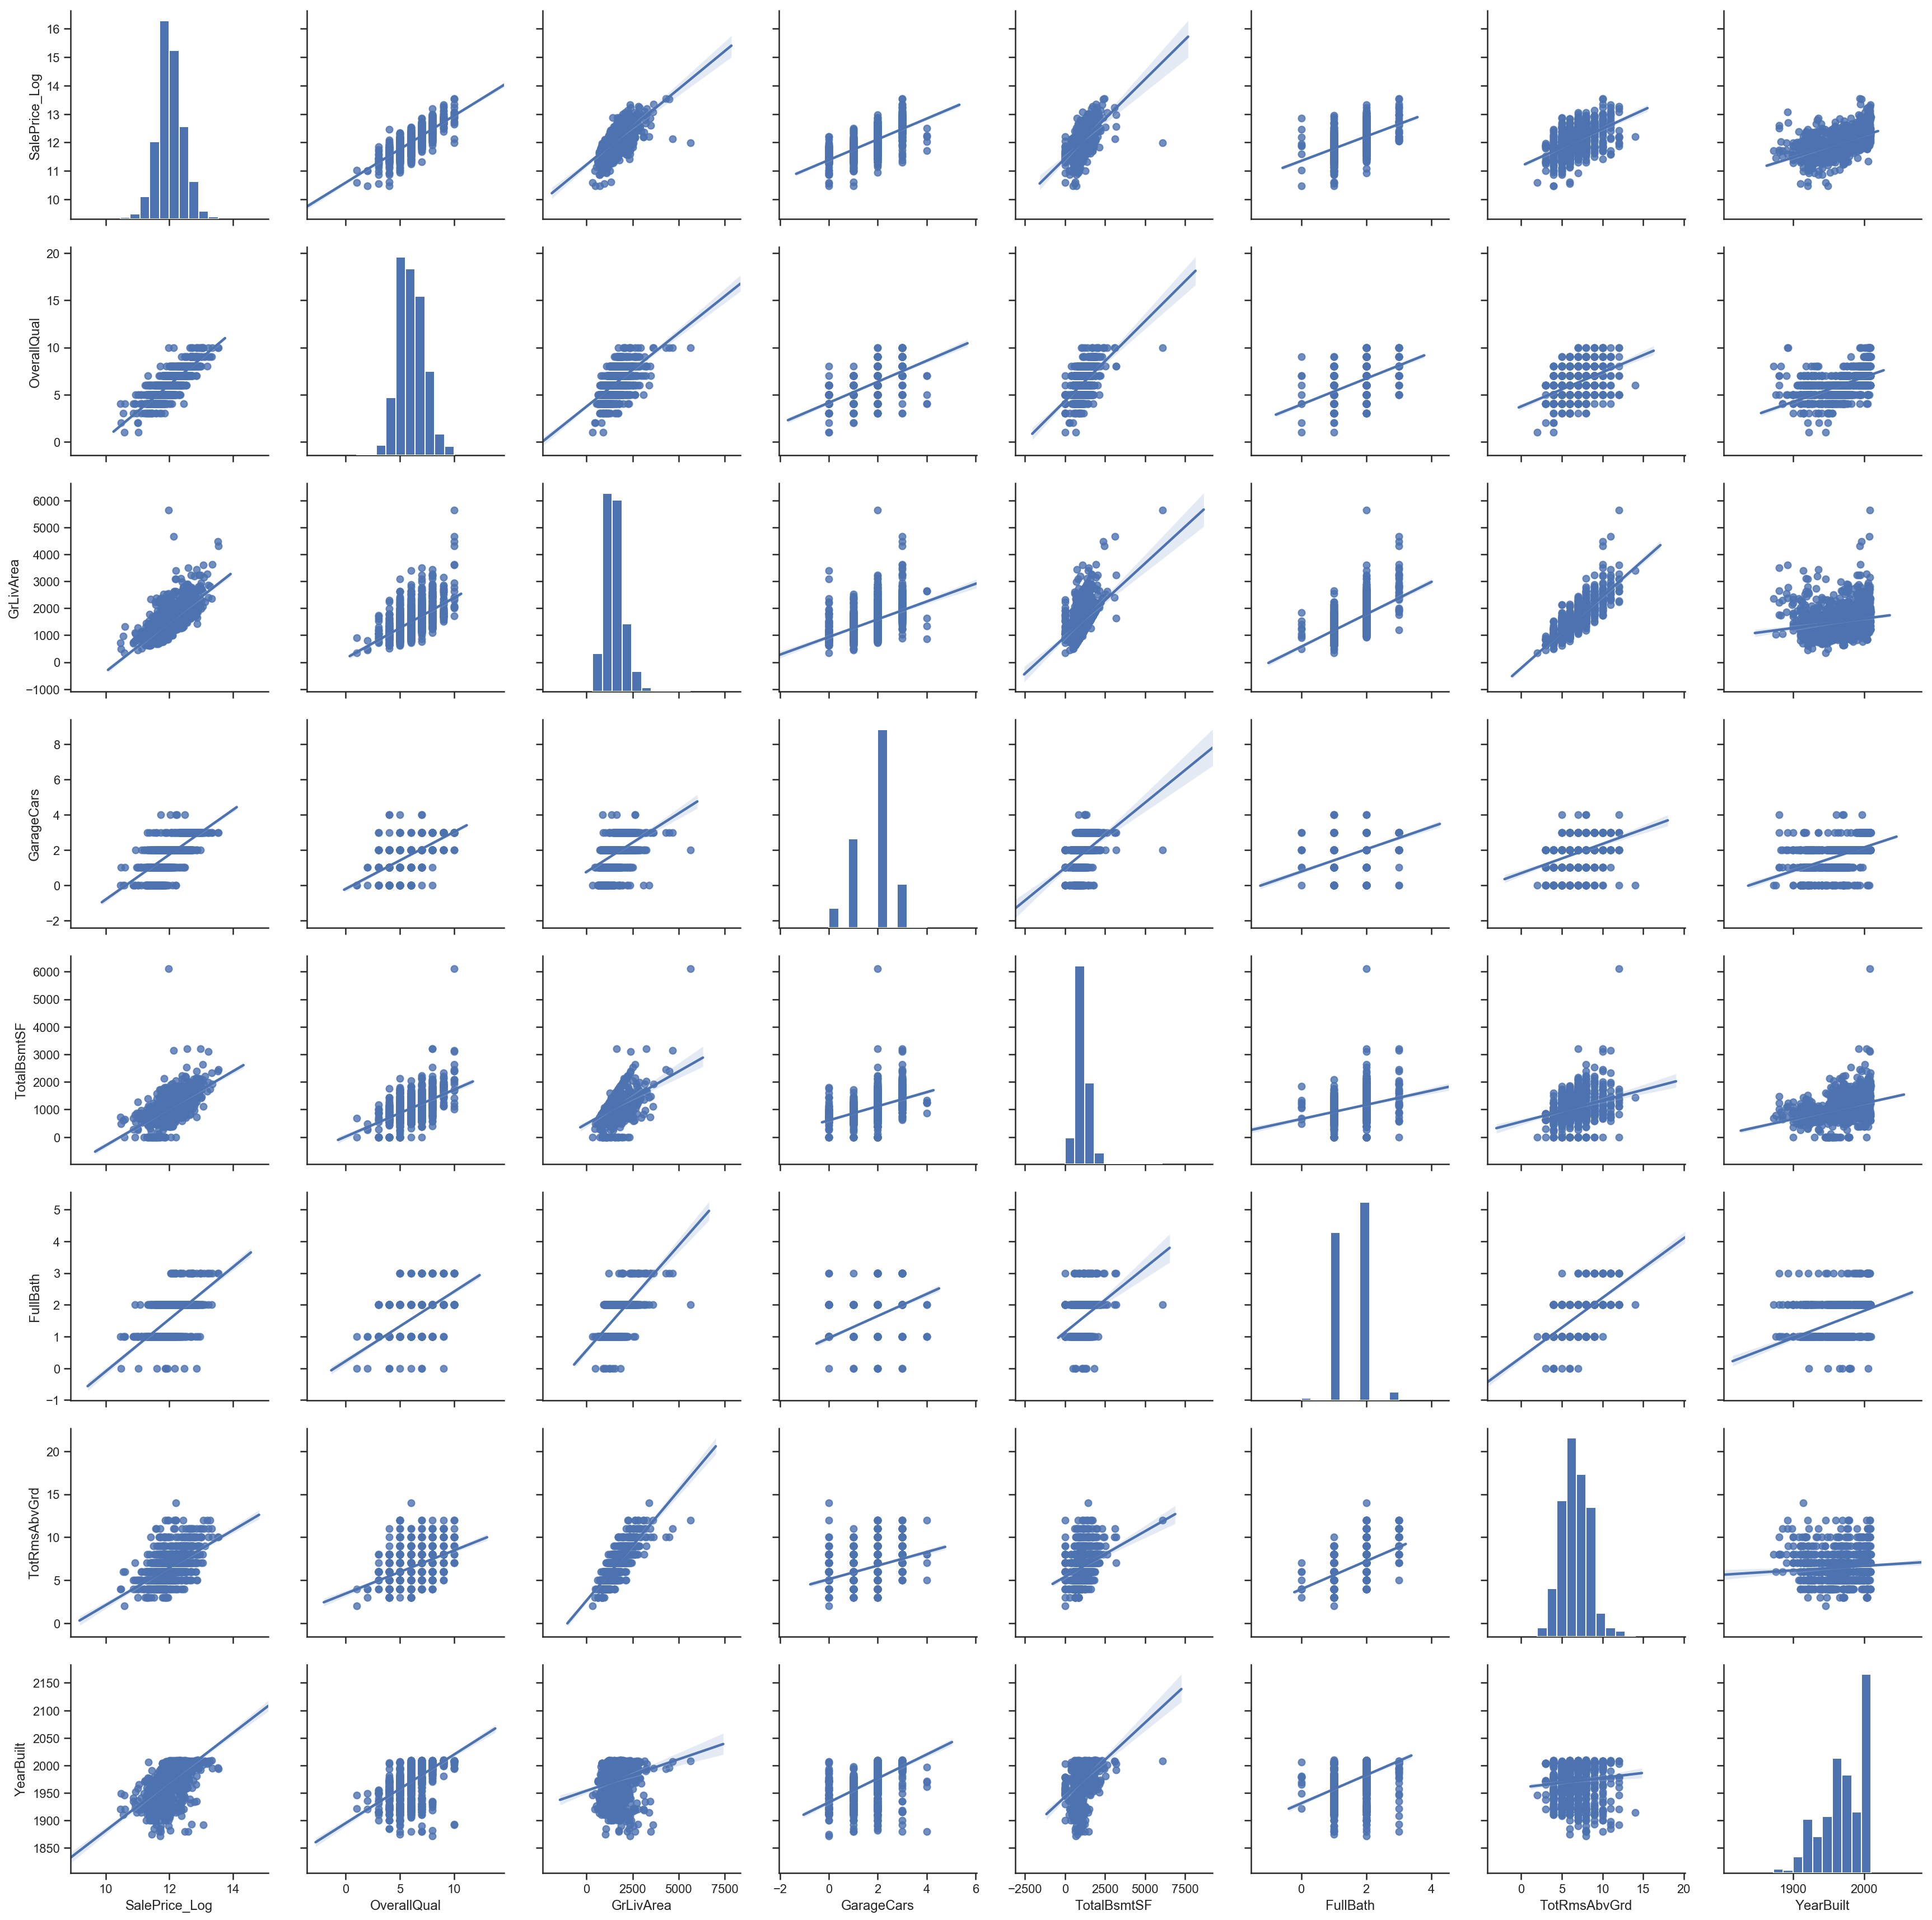

In [35]:
col = ['SalePrice_Log', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], height=3,kind='reg')

In [36]:
#Find most important features - top 20
xcorr = train.corr()
xcorr.sort_values(['SalePrice_Log'], ascending=False, inplace=True)
xcorr.SalePrice_Log.head(20)

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
Name: SalePrice_Log, dtype: float64

In [37]:
# too many , geting the top 50%
#top_feature = corr.index[abs(corr['SalePrice_Log']>0.5)]
#plt.subplots(figsize=(12, 8))
#top_corr = train[top_feature].corr()
#sns.heatmap(top_corr, annot=True)
#plt.show()

In [38]:
#most correlated feature to Sale Price is... Sale Price
#short description of features from the data_description.txt
# OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
# GrLivArea: Above grade (ground) living area square feet
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# TotalBsmtSF: Total square feet of basement area
# 1stFlrSF: First Floor square feet
# FullBath: Full bathrooms above grade
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# YearBuilt: Original construction date

In [39]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [40]:
# plot / check how each relates to Sale Price

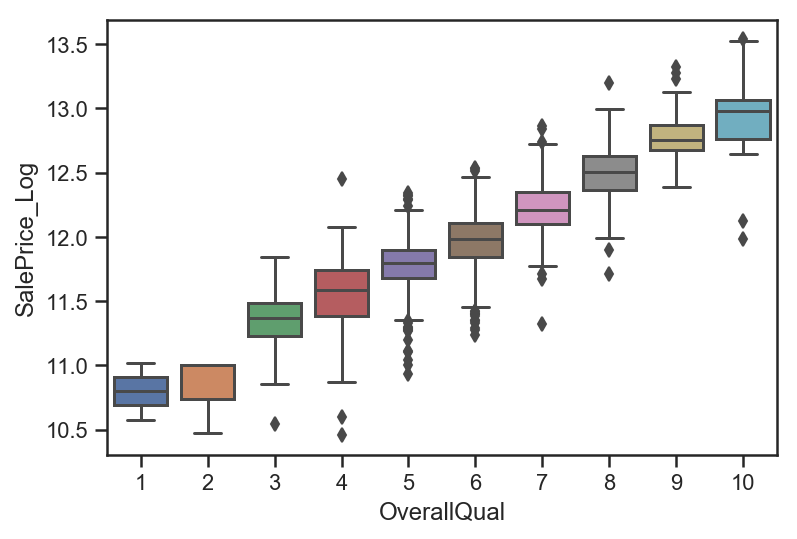

In [41]:
# Overall Quality vs Sale Price

sns.boxplot(x=train['OverallQual'], y=train['SalePrice_Log'])

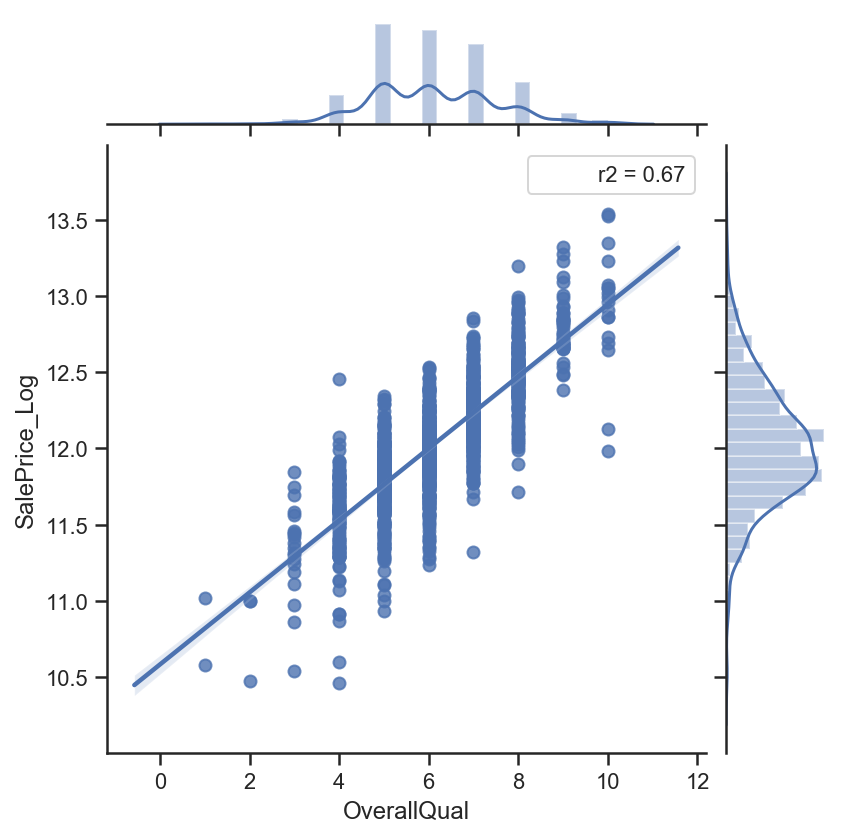

In [42]:
# Living Area vs Sale Price
sns.jointplot(x=train['OverallQual'], y=train['SalePrice_Log'], kind='reg',stat_func=r2)

In [43]:
# Above shows people pay more if the quality is better

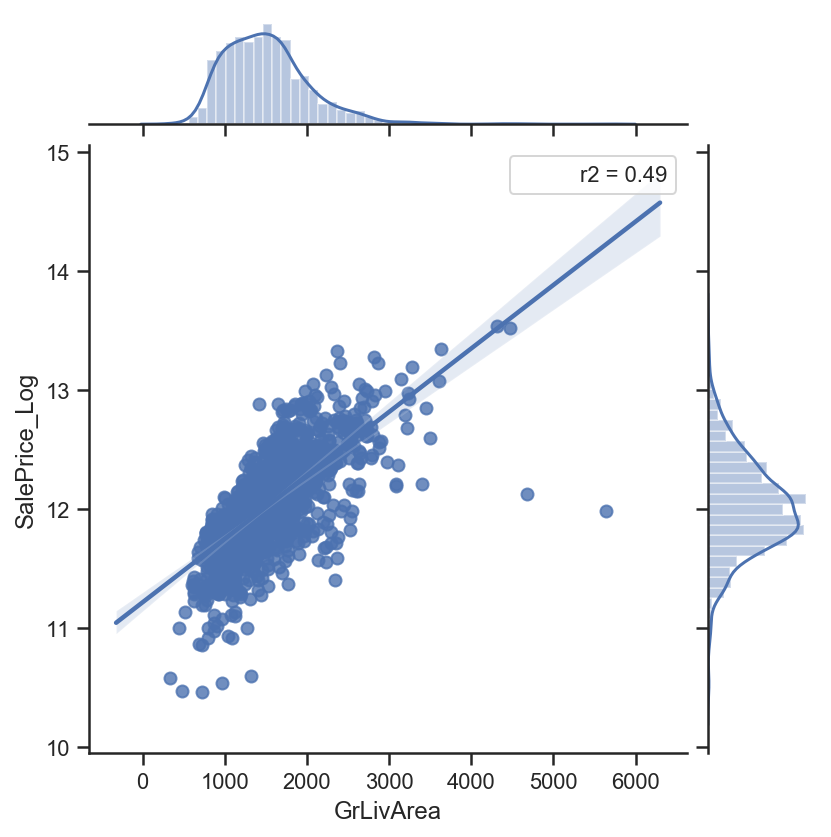

In [44]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice_Log'], kind='reg',stat_func=r2)

In [45]:
# more the living area -> more is the price
#there are few points GrLivArea > 4000, makes no propper sense, so removing them

# Removing outliers manually (Two points in the bottom right)
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice_Log']<300000)].index).reset_index(drop=True)

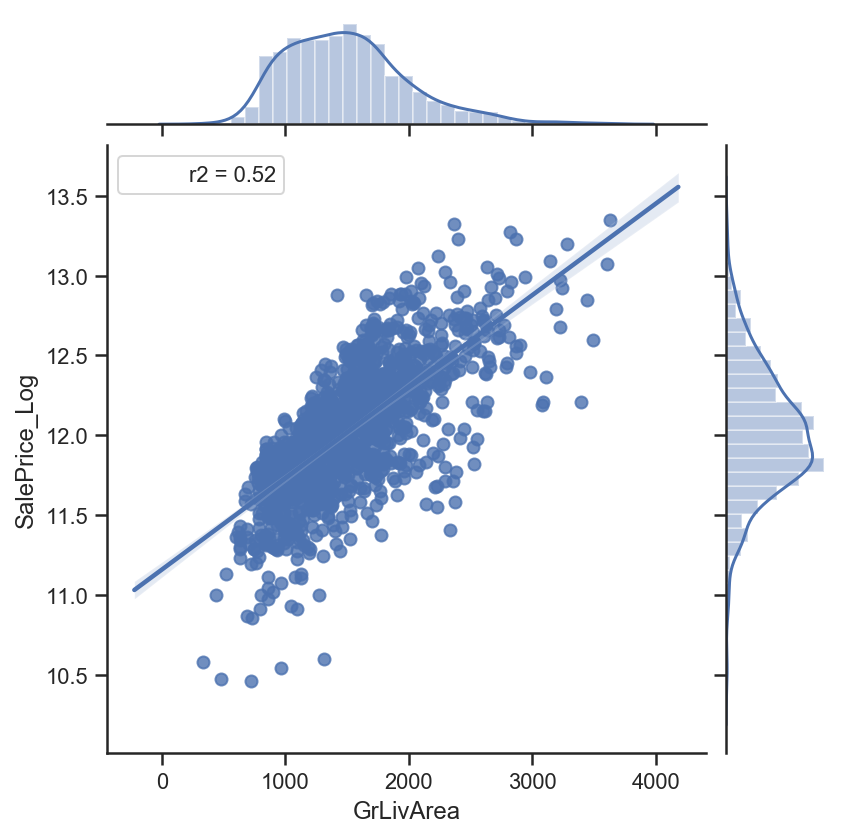

In [46]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice_Log'], kind='reg',stat_func=r2)

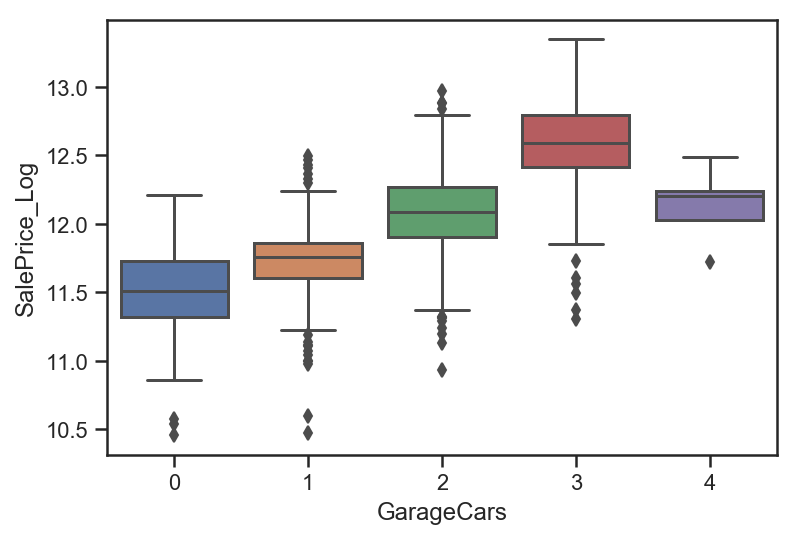

In [47]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice_Log'])
# Issue in data, 4 car garage means less price, not right, will drop it manually

In [48]:
# Removing outliers manually (More than 4-cars, less than $300k)
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice_Log']<300000)].index).reset_index(drop=True)

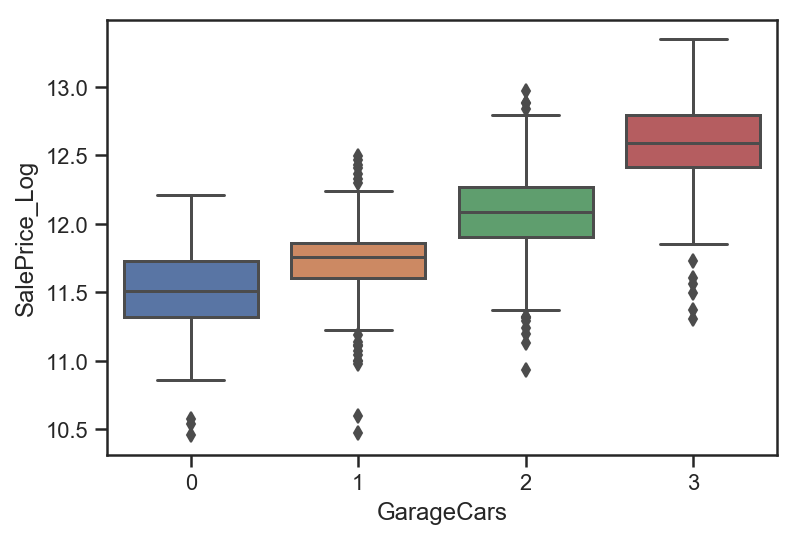

In [49]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice_Log'])

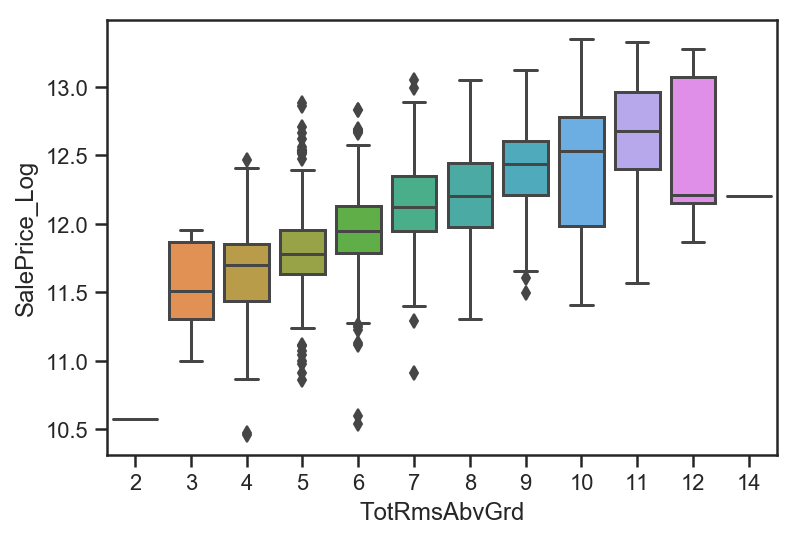

In [50]:
# Total Rooms vs Sale Price
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice_Log'])

<Figure size 1152x576 with 0 Axes>

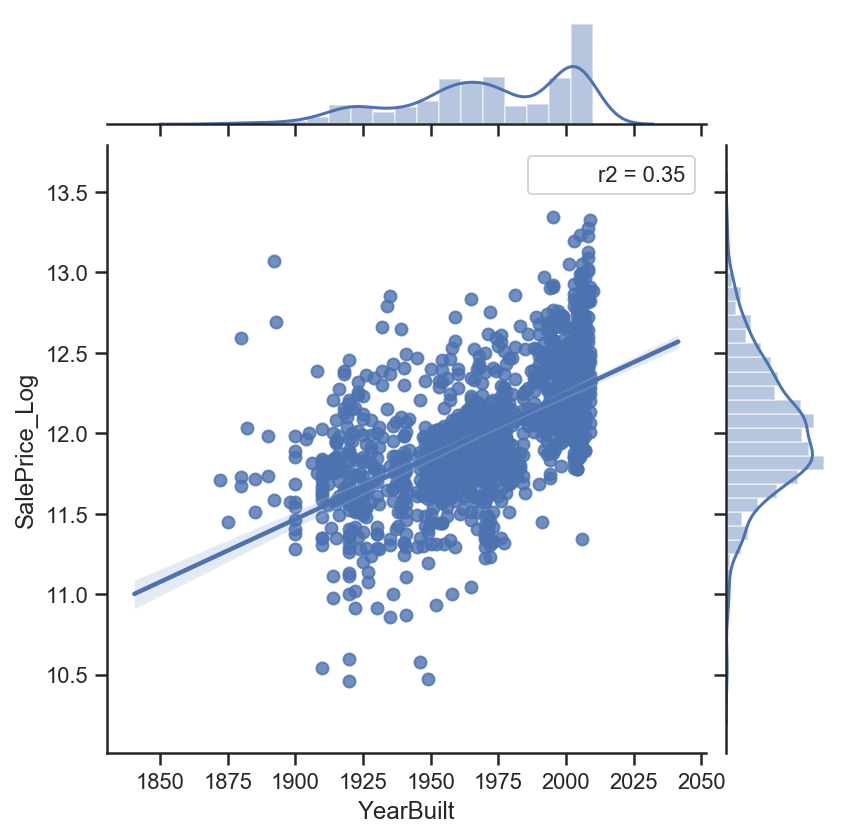

In [51]:
# Year Build vs Sale Price
plt.figure(figsize=(16, 8))
#sns.boxplot(x=train['YearBuilt'], y=train['SalePrice_Log'])
sns.jointplot(x=train['YearBuilt'], y=train['SalePrice_Log'], kind='reg',stat_func=r2)



In [52]:
# this is not a good comparisism, as it looks like house prices decrease with age, 
# not sure because , other factors might also play like inflation or stock market crashes.

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [53]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

test['PoolQC'] = test['PoolQC'].fillna('None')

In [54]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

# # columns where NaN values have meaning e.g. no pool etc. chaanging in Test:

test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')


In [55]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test['LotFrontage'] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [56]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [57]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
#MasVnrArea: Masonry veneer area in square feet
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
#MasVnrArea: Masonry veneer area in square feet
test['MasVnrArea'] = test['MasVnrArea'].fillna(train['MasVnrArea'].mean())

#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
#for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
#    train[col] = train[col].fillna(int(0))

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
BsmtFinSF1: Type 1 finished square feet

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement



In [58]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
    
    
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    test[col] = test[col].fillna('None')

In [59]:
#MasVnrArea: Masonry veneer area in square feet
#MasVnrArea : replace with mean
trnMean_value=train['MasVnrArea'].mean()
train['MasVnrArea'] = train['MasVnrArea'].fillna(trnMean_value)


tstMean_value=test['MasVnrArea'].mean()
test['MasVnrArea'] = test['MasVnrArea'].fillna(tstMean_value)


MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [60]:

#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [61]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

test['Electrical'] = test['Electrical'].fillna(test['Electrical']).mode()[0]

In [62]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

test = test.drop(['Utilities'], axis=1)

In [63]:
#check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index([], dtype='object')

In [64]:
total = train.isnull().sum().sort_values(ascending=False)
total

SalePrice_Log    0
BsmtQual         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtCond         0
RoofStyle        0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
RoofMatl         0
YearRemodAdd     0
HeatingQC        0
LotConfig        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LandSlope        0
                ..
PoolArea         0
GarageCars       0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageArea       0
GarageFinish     0
Electrical       0
HalfBath         0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
BedroomAbvGr     0
GarageYrBlt 

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [65]:
#replace non-important columns with -None

train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')


test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')


In [66]:
#check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index([], dtype='object')

In [67]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [68]:
total = test.isnull().sum().sort_values(ascending=False)
total

MSZoning         4
Functional       2
BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF2       1
KitchenQual      1
Exterior2nd      1
GarageCars       1
GarageArea       1
Exterior1st      1
SaleType         1
BsmtFinSF1       1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtQual         0
BsmtCond         0
ExterCond        0
BsmtExposure     0
BsmtFinType1     0
ExterQual        0
MasVnrArea       0
MasVnrType       0
Foundation       0
SaleCondition    0
RoofMatl         0
BsmtFinType2     0
LotFrontage      0
LotArea          0
Street           0
Alley            0
                ..
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageFinish     0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr

In [69]:
#replace non-important columns with -None


test['MSZoning'] = test['MSZoning'].fillna('None')
test['Functional'] = test['Functional'].fillna('None')
test['KitchenQual'] = test['KitchenQual'].fillna('None')
test['Exterior2nd'] = test['Exterior2nd'].fillna('None')
test['Exterior1st'] = test['Exterior1st'].fillna('None')
test['SaleType'] = test['SaleType'].fillna('None')

tstMean_value=test['BsmtHalfBath'].mean()
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(tstMean_value)

tstMean_value=test['BsmtFullBath'].mean()
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(tstMean_value)

tstMean_value=test['BsmtFinSF2'].mean()
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(tstMean_value)

tstMean_value=test['BsmtFinSF2'].mean()
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(tstMean_value)

tstMean_value=test['GarageCars'].mean()
test['GarageCars'] = test['GarageCars'].fillna(tstMean_value)

tstMean_value=test['TotalBsmtSF'].mean()
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(tstMean_value)

tstMean_value=test['BsmtUnfSF'].mean()
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(tstMean_value)

tstMean_value=test['GarageArea'].mean()
test['GarageArea'] = test['GarageArea'].fillna(tstMean_value)


test.columns[test.isnull().any()]

Index([], dtype='object')

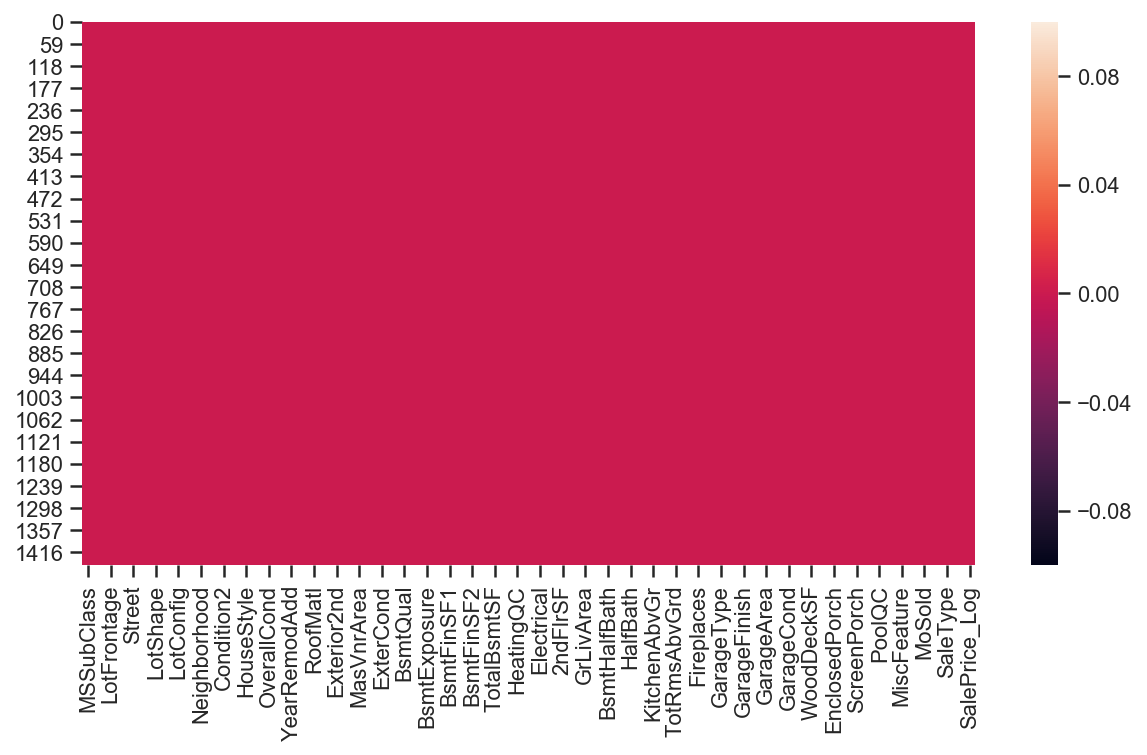

In [70]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

In [71]:
# no missing values

In [72]:
#Transformation/Engineering

Checking some features that may be misinterpreted to represent something it's not.

MSSubClass: Identifies the type of dwelling involved in the sale.

20 1-STORY 1946 & NEWER ALL STYLES
30 1-STORY 1945 & OLDER
40 1-STORY W/FINISHED ATTIC ALL AGES
45 1-1/2 STORY - UNFINISHED ALL AGES
50 1-1/2 STORY FINISHED ALL AGES
60 2-STORY 1946 & NEWER
70 2-STORY 1945 & OLDER
75 2-1/2 STORY ALL AGES
80 SPLIT OR MULTI-LEVEL
85 SPLIT FOYER
90 DUPLEX - ALL STYLES AND AGES
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 1-1/2 STORY PUD - ALL AGES
160 2-STORY PUD - 1946 & NEWER
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [73]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,12.429216


# Modeling and Predictions

# Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score, KFold

Convert categorical dta to numerical
 GarageQual: Garage quality
   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
Ex = 1
Gd = 2
TA = 3


In [75]:
types_train = train.dtypes
cat_train = types_train[types_train == object]
categorical_values_train = list(cat_train.index)


types_test = test.dtypes
cat_test = types_test[types_test == object]
categorical_values_test = list(cat_test.index)

In [76]:
for i in categorical_values_train:
    feature_set = set(train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        train.loc[train[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set = set(test[i])
    for j in feature_set:
        feature_list = list(feature_set)
        test.loc[test[i] == j, i] = feature_list.index(j)

In [77]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,60,4,65.0,8450,1,0,1,2,2,2,...,0,2,1,0,0,2,2008,3,4,12.247694
1,20,4,80.0,9600,1,0,1,2,3,2,...,0,2,1,0,0,5,2007,3,4,12.109011
2,60,4,68.0,11250,1,0,0,2,2,2,...,0,2,1,0,0,9,2008,3,4,12.317167
3,70,4,60.0,9550,1,0,0,2,1,2,...,0,2,1,0,0,2,2006,3,0,11.849398
4,60,4,84.0,14260,1,0,0,2,3,2,...,0,2,1,0,0,12,2008,3,4,12.429216


In [78]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,60,4,65.0,8450,1,0,1,2,2,2,...,0,2,1,0,0,2,2008,3,4,12.247694
1,20,4,80.0,9600,1,0,1,2,3,2,...,0,2,1,0,0,5,2007,3,4,12.109011
2,60,4,68.0,11250,1,0,0,2,2,2,...,0,2,1,0,0,9,2008,3,4,12.317167
3,70,4,60.0,9550,1,0,0,2,1,2,...,0,2,1,0,0,2,2006,3,0,11.849398
4,60,4,84.0,14260,1,0,0,2,3,2,...,0,2,1,0,0,12,2008,3,4,12.429216


In [79]:
X_train = train.drop(["SalePrice_Log"], axis=1).values
y_train = train["SalePrice_Log"].values
X_test = test.values

In [80]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [81]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.0min finished


Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Score: 0.8591364872501658


In [82]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8794975002318997
RMSE Score: 0.13876548419105206


In [83]:
use_logvals = 1 
pred_rf = rf.predict(test)

sub_rf = pd.DataFrame()
sub_rf['Id'] = test_ID

sub_rf['Preditcted RF SalePrice'] = pred_rf 

if use_logvals == 1:
    sub_rf['Preditcted RF SalePrice'] = np.exp(sub_rf['Preditcted RF SalePrice']) 

    
sub_rf.to_csv('data/rf.csv',index=False)
sub_rf

,Id,Preditcted RF SalePrice
0,1461,126479.139649
1,1462,161271.405922
2,1463,166203.314211
3,1464,179919.501035
4,1465,202515.734439
5,1466,177544.264118
6,1467,162678.288356
7,1468,165442.615102
8,1469,187229.804381
9,1470,129953.625565


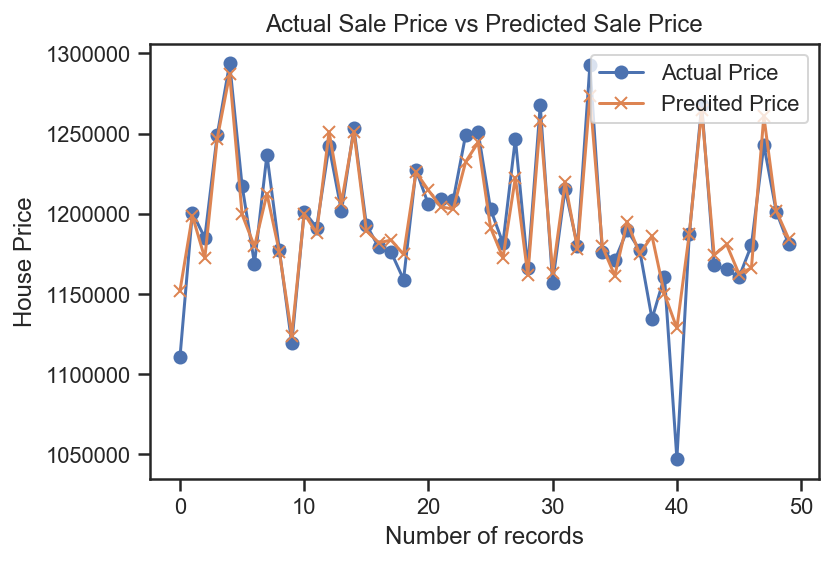

In [84]:
plt.plot(y_valid[:50]*100000, marker='o')
plt.plot(rf_pred[:50]*100000, marker="x")
plt.xlabel('Number of records')
plt.ylabel('House Price')
plt.title('Actual Sale Price vs Predicted Sale Price')
plt.legend(('Actual Price', 'Predited Price'),
           loc='upper right')

# DecisionTreeRegressor

In [85]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score
from sklearn.tree import DecisionTreeRegressor
nr_cv = 5
score_calc = 'neg_mean_squared_error'
param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_dtree.fit(X_training, y_training)

sc_dtree = get_best_score(grid_dtree)
sc_dtree
dtree_pred = grid_dtree.predict(X_valid)
r2_rf = r2_score(y_valid, dtree_pred)
r2_rf

dtree_pred = grid_dtree.predict(X_valid)
r2_rf = r2_score(y_valid, dtree_pred)
r2_rf



Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.20056625564800168
{'max_depth': 10, 'max_features': 12, 'max_leaf_nodes': None, 'min_samples_split': 25, 'presort': False, 'random_state': 5}
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=12,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=25, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   10.1s finished


0.6939875492304526

In [86]:
dtree_pred = grid_dtree.predict(test)

sub_rf['Preditcted DT SalePrice'] = dtree_pred 

if use_logvals == 1:
    sub_rf['Preditcted DT SalePrice'] = np.exp(sub_rf['Preditcted DT SalePrice'])
sub_rf

,Id,Preditcted RF SalePrice,Preditcted DT SalePrice
0,1461,126479.139649,123540.281479
1,1462,161271.405922,143224.103922
2,1463,166203.314211,186280.882365
3,1464,179919.501035,186280.882365
4,1465,202515.734439,237420.305340
5,1466,177544.264118,186280.882365
6,1467,162678.288356,186280.882365
7,1468,165442.615102,186280.882365
8,1469,187229.804381,208494.604247
9,1470,129953.625565,124168.194180


# KNeighborsRegressor

In [87]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_knn.fit(X_training, y_training)

sc_knn = get_best_score(grid_knn)
sc_knn
pred_knn = grid_knn.predict(X_valid)
r2_rf = r2_score(y_valid, pred_knn)
r2_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.23011640957937377
{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    9.4s finished


0.7456513316664339

In [88]:
pred_knn = grid_knn.predict(test)

sub_rf['Preditcted KNN SalePrice'] = pred_knn 

if use_logvals == 1:
    sub_rf['Preditcted KNN SalePrice'] = np.exp(sub_rf['Preditcted KNN SalePrice'])
sub_rf

,Id,Preditcted RF SalePrice,Preditcted DT SalePrice,Preditcted KNN SalePrice
0,1461,126479.139649,123540.281479,146219.241875
1,1462,161271.405922,143224.103922,166472.596643
2,1463,166203.314211,186280.882365,179794.210851
3,1464,179919.501035,186280.882365,199366.171446
4,1465,202515.734439,237420.305340,139508.983738
5,1466,177544.264118,186280.882365,177608.016456
6,1467,162678.288356,186280.882365,138620.682590
7,1468,165442.615102,186280.882365,162738.436099
8,1469,187229.804381,208494.604247,173530.663810
9,1470,129953.625565,124168.194180,118481.660204


In [89]:
list_scores = [sc_dtree, rmse_rf, sc_knn]
list_regressors = ['DTr','RF','KNN']
list_scores

[0.20056625564800168, 0.13876548419105206, 0.23011640957937377]

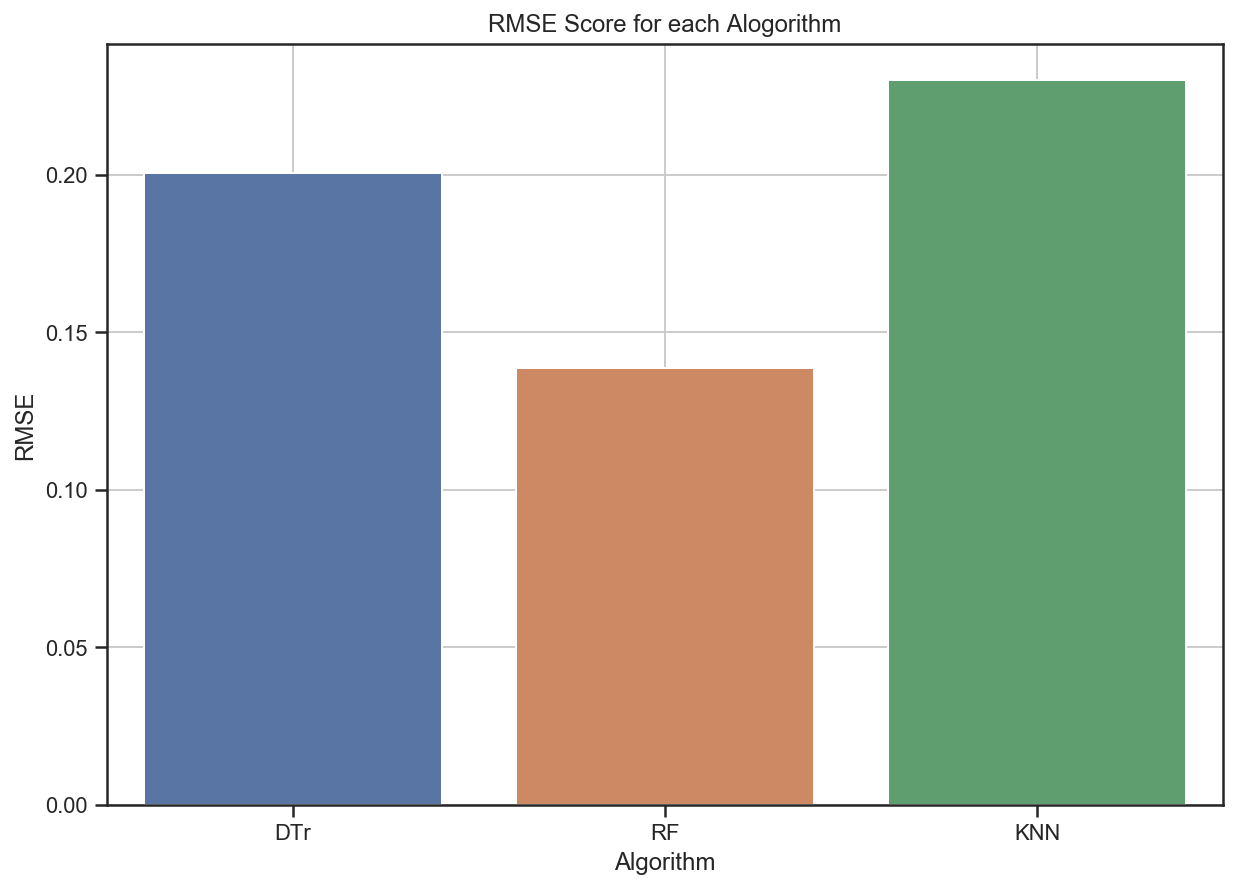

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.xlabel('Algorithm')
plt.title('RMSE Score for each Alogorithm')
plt.grid()
plt.show()

In [91]:
#Since RMSE (Remote mean square error) is least for Random forest , out of the three modeles , 
#here Random Forest regression is performing best

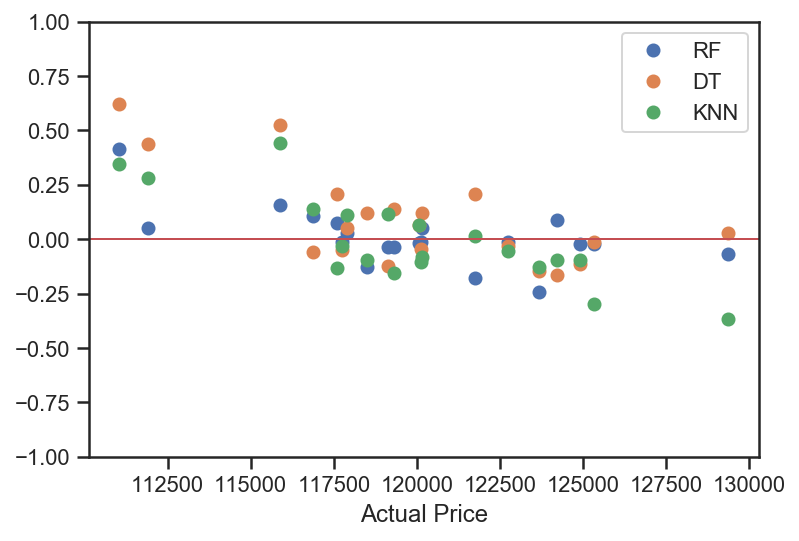

In [92]:
dtree_pred_sample = grid_dtree.predict(X_valid)
kn_pred_sample = grid_knn.predict(X_valid)
df = pd.DataFrame([y_valid[:20],rf_pred[:20],dtree_pred_sample[:20],kn_pred_sample[:20]]).T 
df.columns = ['Actual','RF','DT','KNN']
df['RF_Diff'] = df['RF'] - df['Actual']
df['DT_Diff'] = df['DT'] - df['Actual']
df['KNN_Diff'] = df['KNN'] - df['Actual']
plt.plot(df["Actual"]*10000,df["RF_Diff"], marker='o',linestyle = 'None')
plt.plot(df["Actual"]*10000,df["DT_Diff"], marker='o',linestyle = 'None')
plt.plot(df["Actual"]*10000,df["KNN_Diff"], marker='o',linestyle = 'None')
# plt.plot(rf_pred[:20]*100000, marker="x")
plt.xlabel('Actual Price')
# plt.ylabel('House Price')
# plt.title('Actual Sale Price vs Predicted Sale Price')
plt.ylim(-1,1)
plt.axhline(linewidth=1, color='r')
plt.legend(('RF', 'DT','KNN'),loc='upper right')